### CNN for image classification 
In this project, we use a convolutional neural network to solve the problem of image classification from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). We implement a CNN that reads colour images and classifies them in one of 10 categories. The categories' labels and the respective integer values are the following: 

- 0: airplane 
- 1: automobile
- 2: bird
- 3: cat
- 4: deer 
- 5: dog
- 6: frog 
- 7: horse
- 8: ship
- 9: truck

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization

The CIFAR-10 dataset consists of 32-by-32 coloured images (50,000 images for training and 10,000 images for testing). Since the images are colored, there are RGB values for every pixel. Thus, we need one channel for every basic color (red, green, blue), so in total three channels.

Our goal is to classify an image based on which aforementioned category belongs to. We can achieve this by converting the output to categorical data via a process called one-hot encoding. This process produces arrays whose elements have the form of 1's and 0's and only one element is 1, indicating which class the image belongs to.

In [2]:
def load_data():
  (X_train, y_train), (X_test, y_test) = cifar10.load_data()
  # Reshape the images into the correct dimensions in order to use them in the CNN
  # full-color images have 3 channels: one for red, one for green, and one for blue.
  X_train = X_train.reshape((50000, 32, 32, 3)) 
  X_test = X_test.reshape((10000, 32, 32, 3)) 
  # One-hot encoding - convert the labels into categorical data
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return X_train, y_train, X_test, y_test

In [3]:
def normalize_data(X_train, X_test):
  X_train = X_train.astype('float32') / 255
  X_test = X_test.astype('float32') / 255
  return X_train, X_test

In [4]:
def define_model():
  # Create the CNN
  cnn = Sequential()
  # Add layers to the CNN
  # The filter's dimensions will be 30-by-30 for a 3-by-3 kernel size (two less than the input dimensions)
  # The output for each image will be 30-by-30-by-64-by-3
  cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
  cnn.add(Dropout(0.2))
  cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
  # the pooling layer output's dimensions is 15-by-15-by-64-by-3
  cnn.add(MaxPooling2D(pool_size=(2, 2)))
  # The output of the convolution layer is 13-by-13-by-128-by-3 ()
  cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
  cnn.add(Dropout(0.2))
  cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
  # The pooling layer in Keras rounds down odd image dimensions, so the input of the pooling layer is 12-by-12-by-128-by-3
  # The output of the pooling layer is 6-by-6-by-128-by-3
  cnn.add(MaxPooling2D(pool_size=(2, 2)))
  # The flatten's layer output will be 1-by-13824
  cnn.add(Flatten())
  cnn.add(Dropout(0.2)) 
  # The next layers recognize larger features and the model classifies the images based on the aforementined categories
  cnn.add(Dense(units=4096, activation='relu'))
  cnn.add(Dropout(0.2))
  cnn.add(Dense(units=1024, activation='relu'))
  cnn.add(Dropout(0.2))
  cnn.add(Dense(units=10, activation='softmax'))
  #cnn.summary()
  cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return cnn

In [5]:
def plot_results(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend(loc='upper left')

In [6]:
def run():
  # Load dataset
  X_train, y_train, X_test, y_test = load_data()
  # Data preparation
  X_train, X_test = normalize_data(X_train, X_test)
  # Define the model
  model = define_model()
  # Train the model
  history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
  # Evaluate model
  loss, accuracy = model.evaluate(X_test, y_test)
  # Plot the results
  plot_results(history)
  return loss, accuracy

Epoch 1/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5407 - accuracy: 0.4361 - val_loss: 1.2067 - val_accuracy: 0.5583
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1027 - accuracy: 0.6096 - val_loss: 0.9690 - val_accuracy: 0.6508
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9131 - accuracy: 0.6800 - val_loss: 0.8505 - val_accuracy: 0.7023
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7925 - accuracy: 0.7212 - val_loss: 0.8060 - val_accuracy: 0.7241
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7094 - accuracy: 0.7506 - val_loss: 0.8417 - val_accuracy: 0.7182
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6354 - accuracy: 0.7778 - val_loss: 0.8036 - val_accuracy: 0.7259
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5814 - accuracy: 0.7950 - val_loss: 0.8020 -

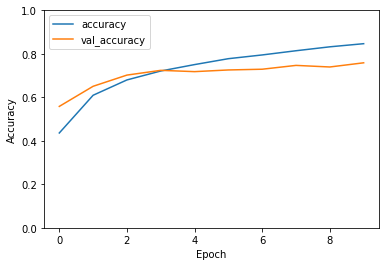

In [7]:
# the loss is summation of errors, whereas the accuracy is a percentage
loss, accuracy = run()
print('The loss is: {:.2f}'.format(loss))
print('The accuracy is: {:.2f}%'.format(accuracy))